## Importing libraries
* scikit-image input output functionality (for reading images)
* matplotlib.pyplot for plotting

In [1]:
import skimage.io as skio
import matplotlib.pyplot as plt
import tifffile

## Reading a demo tif file
Read the image and ask for its shape

In [4]:
#read the image using tifffile at location ../data/rice.tif
with tifffile.TiffFile("../data/rice.tif") as tif:
        img = tif.asarray()


#print the shape of the image
img.shape

# !note how ipython prints the output

(512, 512)

Plot the image data. Use matploitlib to plot the image and make sure it was loaded correctly
We can customize the plot to our needs.

We also print the min and max value if the pixels (gray scale)

min pixel value:  33
max pixel value:  214


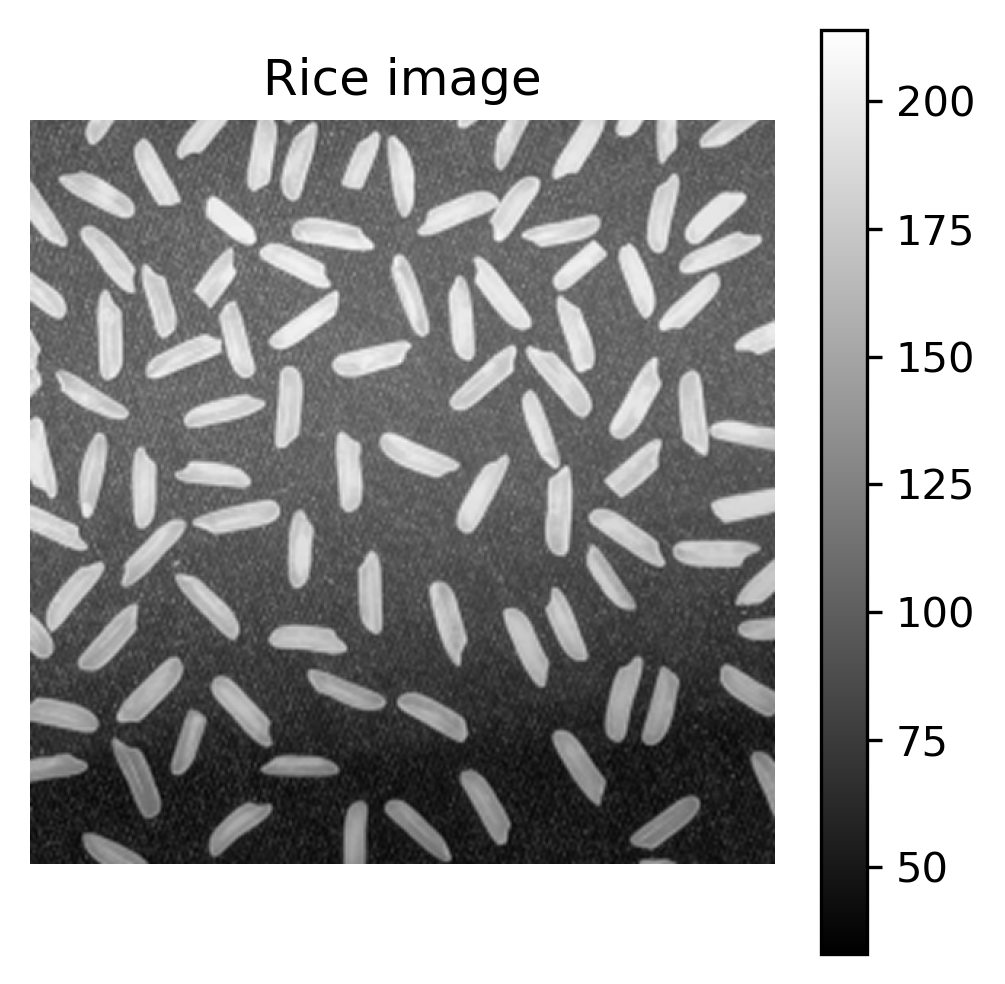

In [5]:
plt.figure(figsize=(4, 4), dpi=300)
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.title('Rice image')
plt.axis('off')
# also print the min and max value of the iamge
print('min pixel value: ', img.min())
print('max pixel value: ', img.max())

## Trying to segment the image
Let us try to segment the image without any pre-processing using the otsu method.

Import threshold_otsu from skimage.filters
apply the filter to the image to get the threshold
print the threshold for information
get a new image by teking all pixels with values larger than threshold

In [6]:

# importing otsu from scikit-image
from skimage.filters import threshold_otsu
th_val = threshold_otsu(img)
print('The value is: ', th_val)

#bw_otsu is now the binary image created by thresholding the original image with the otsu value
bw_otsu = img > th_val


The value is:  131


Show the "segmented" image

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

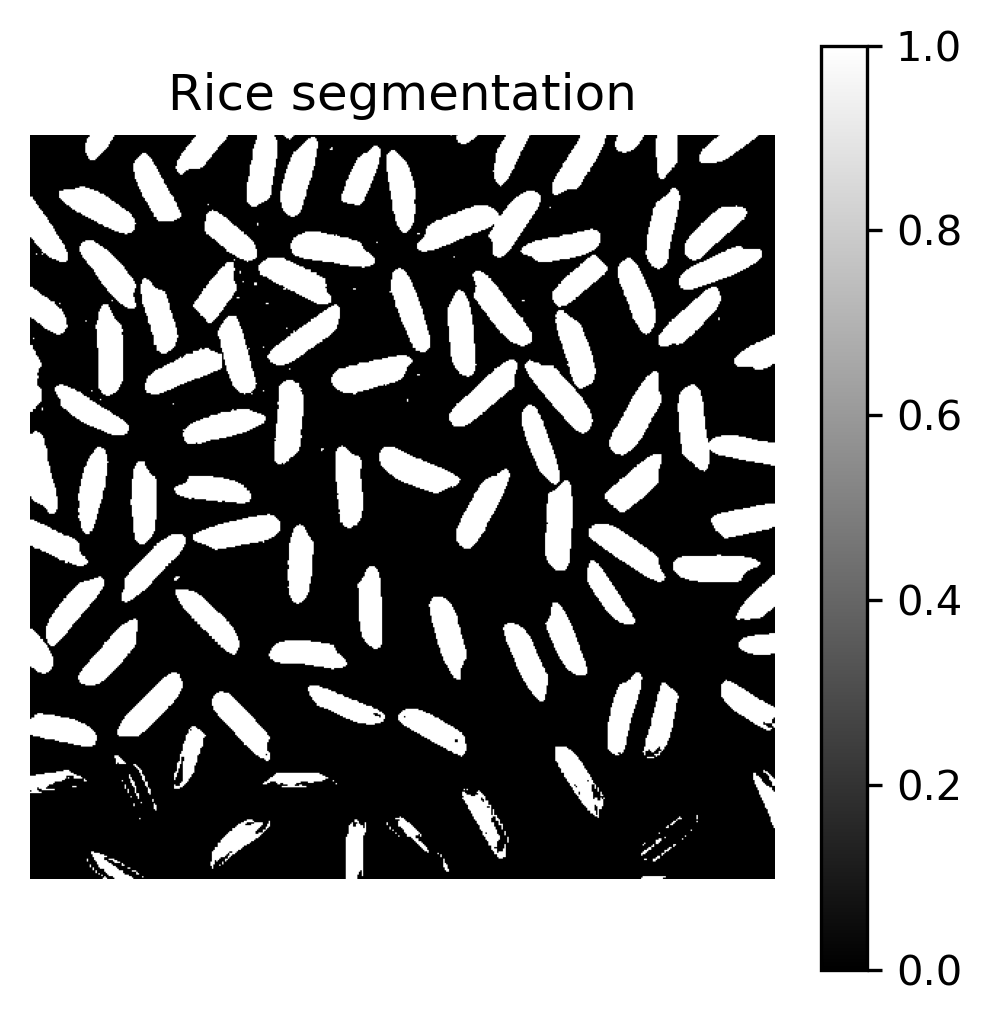

In [7]:


plt.figure(figsize=(4, 4), dpi=300)
plt.imshow(bw_otsu, cmap='gray')
plt.colorbar()
plt.title('Rice segmentation')
plt.axis('off')

Unfortunately the segmentation is not good due to uneven illumination.
## Pre-processing to remove uneven illumination
For this we will use a simple gaussian blur.

Import gaussian from skimage.filters

create the blurred image from the orginal image


In [ ]:
# importing gaussian filter from scikit-image
from skimage.filters import gaussian
img_bg = gaussian(img,sigma=50,preserve_range=True)

Plot the blurred imaged

In [ ]:

plt.figure(figsize=(4, 4), dpi=300)
plt.imshow(img_bg, cmap=plt.cm.gray)
plt.colorbar()
plt.title('Background')
plt.axis('off')

Remove background from image and plot the resulting image

In [ ]:
img_no_bg = img - img_bg

plt.figure(figsize=(4, 4), dpi=300)
plt.imshow(img_no_bg, cmap='gray')
plt.colorbar()
print('min pixel value: ',img_no_bg.min())
print('max pixel value: ',img_no_bg.max())
plt.title('Background corrected')
plt.axis('off')

Now we redo the segmentation on the pre-processed image:
calculate otsu threshold
take pixels with higher values than threshold

In [ ]:
th_val = threshold_otsu(img_no_bg)
print('The value is: ', th_val)
bw_otsu = img_no_bg > th_val


Plot the resulting image

In [ ]:
plt.figure(figsize=(4, 4), dpi=300)
plt.imshow(bw_otsu, cmap='gray')
plt.colorbar()
plt.title('Rice segmentation\nafter correction')
plt.axis('off')

**Much better! :D**

## Simple quantification
Now we will use scikit-image together with pandas to create output tables from our results and then plot some values of interest, in this case area.

Import label and regionprops_table from skimage.measure
clear_border from skimage.segmentation
and are_opening from skimage-morphology.

Also import pandas as pd

In [ ]:
import pandas as pd
from skimage.measure import label, regionprops_table
from skimage.segmentation import clear_border
from skimage.morphology import area_opening

Remove segments that touch the border of the image

Remove small objects by doing "area opening"

Do connected component analysis to assign unique ids to each object

In [ ]:
# remove segmentations that touch the border of the iamge
clr_border = clear_border(bw_otsu)

# remove small objects
opened = area_opening(clr_border, area_threshold=200)

# run connected component analysis
lbl = label(opened)

Plot the result

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), dpi=100)

axes[0].imshow(clr_border, cmap='gray')
axes[1].imshow(opened, cmap='gray')
axes[2].imshow(lbl)

for ax in axes:
    ax.axis('off')  # Hide axes/ticks for a cleaner look

plt.tight_layout()
plt.show()
                       

Now we can calculate some properties, both morphological and intensity based

In [ ]:
properties = ['label', 'area','eccentricity','intensity_mean']
table = regionprops_table(label_image=lbl,
                          intensity_image=img,
                          properties=properties)
table = pd.DataFrame(table)
print("Head of the table:")
print(table.head())
print("\n")

print("Summary statistics of the table:")
print(table.describe())


table.hist(column='area', figsize=(4, 4))

Look at the webpage https://scikit-image.org/docs/0.25.x/api/skimage.measure.html#skimage.measure.regionprops

are there any oither properties that could be interesting to add to the table?

Add or replace a few of the properties and plot som of them

For example, see if you can find one more property that is similar between the objects and one property that appears very random. Plot their respective histograms.

In [ ]:
properties = ['label', 'area','eccentricity','intensity_mean','perimeter', 'orientation', 'extent','feret_diameter_max'] #add more properties here
table = regionprops_table(label_image=lbl,
                          intensity_image=img,
                          properties=properties)
table = pd.DataFrame(table)
table.hist(column='feret_diameter_max', figsize=(4, 4))